<a target="_blank" href="https://colab.research.google.com/github/davalpez/MyKaggle/blob/MyKaggle/Tensorflow%20basics/TF-CNN.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Creating a Convoluted Neural Network

Lets's start by defining what a Convoluted Neural Network, also known a CNN is.

A CNN is a feed-forward neural network that learns features via filter optimization. What is the differente between a CNN and the usual NN we have been running so far?

CNN uses a certain grid or kernel that is passed or slided through the matrix layer and performs convoluted operation, obtaining an activated layer as a result.

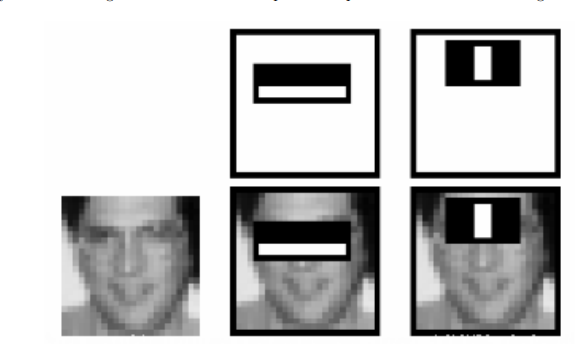

This is the process used i.e. for detecting faces when processing an image, as we use these combination of kernels or feature detectors to confirm that there is a certain object we aim to idetinfy.

## Architecture differences between CNN and NN

Another thing we will take a look in depth when running an example are the differences in the structural architecture we have between the NN we have run so far in other examples and the CNN. 

While the NN can have a simple structure ( we have at least opted to do so before. It may contain more layers and more complex structure for more complex problems, of course ), the CNN on the other hand has a particular order for layers, where it mixes convolutional and pooling layers through the network, ending with fully connected layers and a classification layer.

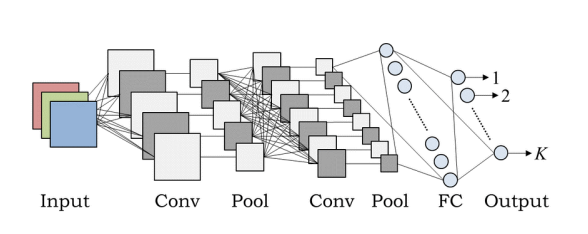

As the CNN has great capabilities for identification, normally we use non-binary classification for multiple classes. On this example, we would go for binary classification as we will work with the classification between two types of food first from the repository [Food-101](https://www.kaggle.com/datasets/dansbecker/food-101).

## Loading the data.

I have downloaded the [Food-101](https://www.kaggle.com/datasets/dansbecker/food-101) repository and substracted and divided two of the classes we have there and divided them into training and test folders in a 70-30 relation.


In [1]:
!ls ../Sources/food-101

test  train


In [2]:
!ls ../Sources/food-101/train/steak

1000205.jpg  146833.jpg   1882831.jpg  231296.jpg   331860.jpg	636594.jpg
100135.jpg   1476404.jpg  1888450.jpg  2315011.jpg  332232.jpg	637374.jpg
100274.jpg   1482489.jpg  1889336.jpg  2315295.jpg  332557.jpg	638678.jpg
1012080.jpg  1485083.jpg  1902895.jpg  2323132.jpg  336637.jpg	640024.jpg
101312.jpg   148595.jpg   1907039.jpg  2324994.jpg  339891.jpg	640539.jpg
1016217.jpg  1487113.jpg  1925230.jpg  2327701.jpg  345734.jpg	644777.jpg
1021458.jpg  148916.jpg   1927984.jpg  2331076.jpg  347745.jpg	644867.jpg
1032846.jpg  149087.jpg   1930577.jpg  2339231.jpg  354329.jpg	647683.jpg
10380.jpg    1493169.jpg  1937872.jpg  233964.jpg   354513.jpg	653303.jpg
1049459.jpg  149682.jpg   1941807.jpg  2344227.jpg  355715.jpg	658189.jpg
1053665.jpg  1498778.jpg  1942333.jpg  234626.jpg   356234.jpg	660900.jpg
1064847.jpg  1499273.jpg  1945132.jpg  234704.jpg   358042.jpg	66183.jpg
1068516.jpg  1508094.jpg  1951003.jpg  2353677.jpg  358045.jpg	66207.jpg
1068975.jpg  1512226.jpg  1956040.jpg  2

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("../Sources/food-101"):
  print(f" {len(dirnames)} Directories and {len(filenames)} images in '{dirpath}'.")

 2 Directories and 0 images in '../Sources/food-101'.
 2 Directories and 0 images in '../Sources/food-101/test'.
 0 Directories and 300 images in '../Sources/food-101/test/sushi'.
 0 Directories and 300 images in '../Sources/food-101/test/steak'.
 2 Directories and 0 images in '../Sources/food-101/train'.
 0 Directories and 700 images in '../Sources/food-101/train/sushi'.
 0 Directories and 700 images in '../Sources/food-101/train/steak'.


Taking a look to what some of the training images look like :

In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def DisplayImage(directory_path,food):
  '''
  Function to display a random image from one of the trainining
  folders for our food CNN

  Args:
  directory_path : Path to our source folder.
  food: Name of food folder we want to display an image from.
  
  return:
  img.shape : shape of the image file.
  '''
  # define path variables
  local_path = directory_path + food + "/"
  random_image = random.sample(os.listdir(local_path), 1)

  # 
  img = mpimg.imread(local_path + "/" + random_image[0])
  plt.imshow(img)
  plt.title(food)
  plt.axis("off");

  return img

(384, 512, 3)

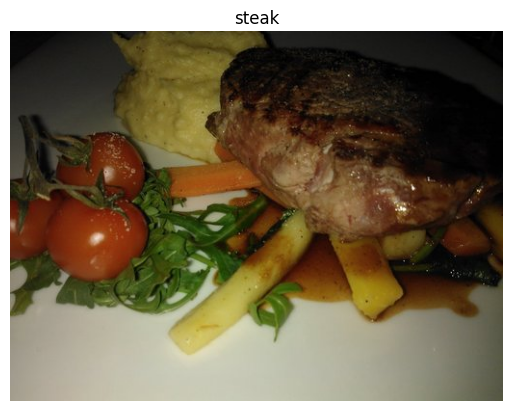

In [5]:
source_path = "../Sources/food-101/train/"
train_image = DisplayImage(source_path,"steak")
train_image.shape

Examining different images, we can see how the image comes in the 3 color channel RGB and also comes in different sizes. Some of them are 512x512 but there other sizes as well (384x512,307x512).

If we have some basic knowledge from computer vision, we also know that images are represented on these 3 channels from 0 to 255 values. As we know NN work better with lower values, we can normalize the values of the images by dividing their values by 255. This means that instead of having a range of 0-255, we will have in our inputs a range of 0-1.

## Creating our CNN

When creating a new CNN, we know already from creating a NN all the hyperparameters we need to have in mind to tweak to improve the efficiency of the network. An extra layer of complexity comes into the CNN for deciding what kind of layers and how to mix them to have an efficient feed-forward process, extract and mantain the characeristics of substracted for the classification of the images.

We can take a look to guide us at the start of some previous sucessful CNNs to start our experiment.

In [6]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input,Activation


2025-02-04 10:09:19.880663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738656559.971292     728 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738656559.999631     728 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 10:09:20.328051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


For this example, I have decided to use as a reference [AlexNet](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), one of the firsts and most influencial CNNs created.

Why using Alexnet? For this example, we want to show a CNN that has an acceptable performance with a low computational cost.

### Define the CNN architecture

Alexnet has 5 convolutional layers, with some of them followed by max-pooling layers, and 3 fully-connected layers with a final output layer using softmax function.

Let's try to recreate its structure by using Tensorflow models.

#### AlexNet replication

In [7]:
# AlexNet CNN model-like.

# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_AN = tf.keras.models.Sequential([
 # 1st Conv
   Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
 # 2nd Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
 # 3rd Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
 # 4th Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
 # 5th Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
 # Flatten layer
   Flatten(),
 # 1st Fully Connected 
   Dense(4096, activation='relu'),
   Dropout(0.5),
 # 2nd Fully Connected  
   Dense(4096, activation='relu'),
   Dropout(0.5),
 # Output Layer 
   Dense(1, activation="sigmoid") 
])


/home/david/venv39gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738656564.397074     728 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


### Ensuring the use of GPU for tensorflow operations

One thing to note here is that executing the code of the CNNs can be very demanding as the matrix operations executed are handling millions of float operations.

Let's make sure tensorflow is using GPU :

In [8]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


We will check that we obtain an error if we use a GPU that is not listed.

In [9]:
import os

# These are kept as '3' to avoid excess of logs during the runtime. 
# Switch them to '0' to visualize device usage for the tensorflow operations :)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
os.environ['CUDA_VISIBLE_DEVICES'] = '3' 



In [10]:
from tensorflow.python.framework.errors_impl import InvalidArgumentError 

# Disable automatic fallback to an available device
tf.debugging.set_log_device_placement(False)
tf.config.set_soft_device_placement(False)


try:
  # Specify an invalid GPU device
  with tf.device('/device:GPU:5'):
    a = tf.constant([[1.0, 2.0], [4.0, 5.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    c = tf.matmul(a, b)
except InvalidArgumentError as e:
    print(f"Caught InvalidArgumentError: {e}")

Caught InvalidArgumentError: Could not satisfy device specification '/job:localhost/replica:0/task:0/device:GPU:5'. enable_soft_placement=0. Supported device types [GPU, CPU]. All available devices [/job:localhost/replica:0/task:0/device:GPU:0, /job:localhost/replica:0/task:0/device:CPU:0].


Now, we choose to enable back soft device placement so we know that Tensorflow will try to use the GPUs available for the operations:

In [11]:
# Now re-enable soft device to redirect operations to the available GPU
tf.config.set_soft_device_placement(True)


try:
  # Specify an invalid GPU device, but noe soft device placement is true
  with tf.device('/device:GPU:0'):
    a = tf.constant([[1.0, 2.0], [4.0, 5.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    c = tf.matmul(a, b)
except InvalidArgumentError  as e:
    print(f"Caught InvalidArgumentError: {e}")

*Note: for seeing full logs, it is possible to switch TF_CPP_MIN_LOG_LEVEL and CUDA_VISIBLE_DEVICES from os.environ to 0, and we can easily see wether the GPU or CPU is used. This comes with showing debugging logs for log_device_placement True until the kernel is restarted, so as a matter of convinience, you might not see the logs for GPU operations allocation in this notebook.*

We can see how now Tensorflow is correctly using the GPU device we have available. Let's continue and try to train our CNN!

## Training our network

First part before training our network, is being sure that the data we are going to pass to produce the training is correctly proccessed and treated. As we mentioned before, we can normalize the data when we are working with imags by just getting the values of the RGB spectrum from 0-255 to 0-1. We can eassily do it with the function [Image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory).

In [12]:
training_dir= "../Sources/food-101/train"
testing_dir = "../Sources/food-101/test"


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="binary", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(testing_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224), # resize image to the designated value
                                               label_mode="binary", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

Found 1400 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


We created the model before following the specifications of the AlexNet architecture. Let's try to compile and see if we can fit the model for the first training attempt just as we have done before for previous classification networks.

In [13]:
# 2. Compile the model
model_AN.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [14]:
# 3. Fit the model
model_AN_history = model_AN.fit(train_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5


I0000 00:00:1738656570.528269    1066 service.cc:148] XLA service 0x7f8a00006060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738656570.536676    1066 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2025-02-04 10:09:30.645693: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738656571.059353    1066 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-04 10:09:31.975184: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,256,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,96,26,26]{3,2,1,0}, f32[256,96,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"c

 1/44 ━━━━━━━━━━━━━━━━━━━━ 11:10 16s/step - accuracy: 0.5625 - loss: 3.9940

I0000 00:00:1738656582.978949    1066 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5186 - loss: 321.6184

2025-02-04 10:09:45.667473: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,256,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,96,26,26]{3,2,1,0}, f32[256,96,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:09:45.976226: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,384,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,256,12,12]{3,2,1,0}, f32[384,256,3,3]{3,2,1,0}, f32[384]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasA

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5185 - loss: 311.3221

2025-02-04 10:09:50.191661: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,256,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,96,26,26]{3,2,1,0}, f32[256,96,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:09:50.493618: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,384,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,256,12,12]{3,2,1,0}, f32[384,256,3,3]{3,2,1,0}, f32[384]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasA

44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step - accuracy: 0.5184 - loss: 306.4990 - val_accuracy: 0.5317 - val_loss: 0.6648
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5961 - loss: 0.6812 - val_accuracy: 0.5000 - val_loss: 0.6969
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4991 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.4788 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4850 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932


With just 5 epochs of training, we can see that the validation accuracy is 73%, which is not a bad value. We can retrieve a function that we used in our tf-multiclass notebook and have a look to some of these predictions to see the interpretation of the network while visualizing the data.

In [96]:
def PreprocessImage(image_path, img_size=(224, 224)):
    image = tf.io.read_file(image_path)  # Read file
    image = tf.io.decode_jpeg(image, channels=3)  # Decode JPG (or use decode_png)
    image = tf.image.resize(image, img_size)  # Resize to match model input
    image = image / 255.0  # Normalize (if done during training)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [115]:
def PreprocessImageNR(image_path, img_size=(224, 224)):
    image = tf.io.read_file(image_path)  # Read file
    image = tf.io.decode_jpeg(image, channels=3)  # Decode JPG (or use decode_png)
    image = tf.image.resize(image, img_size)  # Resize to match model input
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [16]:
import numpy as np

def PredictRandomImage(model):
  """Displays a random image from the dataset and shows if the prediction label
     correlates with the image folder's label

  Args:
    model: Trained model with the dataset.

  """
  # Choose random test folder.
  possiblep_path = ["../Sources/food-101/test/steak/", "../Sources/food-101/train/sushi/"]
  folder_path = random.choice(possiblep_path)

    # Depics correct/miss label
  if folder_path.endswith("steak/"):
    true_label = "steak"
  else:
    true_label = "sushi"

  random_image = random.sample(os.listdir(folder_path), 1)
  image_path = folder_path + random_image[0]

  print(image_path)

  # Preprocess image
  processed_image = PreprocessImage(image_path)

  # Model prediction

  predicted_prob = model.predict(processed_image)
  predicted_class = 1 if predicted_prob >= 0.5 else 0
  confidence = (abs(predicted_prob - 0.5) * 200).item()

  # Plots image

  img = mpimg.imread(image_path)
  plt.imshow(img)

  # Map index to class names (same order as used in training)
  class_names = ["steak", "sushi"]  

  predicted_label = class_names[predicted_class] 
  # Depics correct/miss label
  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"

  print("predicted confidence is ",confidence,"for ",predicted_label)
  # Add xlabel information (prediction/actual label)
  plt.xlabel("Prediction: {} {:2.0f}% (Actual label: {})".format
               (predicted_label,
               100*tf.reduce_max(predicted_prob),
               true_label),
               color=color)

../Sources/food-101/test/steak/3100563.jpg


2025-02-04 10:10:03.426255: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,256,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,96,26,26]{3,2,1,0}, f32[256,96,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:10:03.541043: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,384,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,256,12,12]{3,2,1,0}, f32[384,256,3,3]{3,2,1,0}, f32[384]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActiv

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted confidence is  0.6190359592437744 for  steak


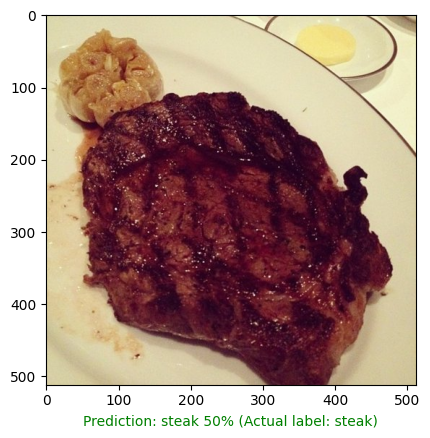

In [17]:
PredictRandomImage(model_AN)

We probably can improve these numbers to have a bit better scoring for the predictions. Let's try as we have done with multiclassification before, reduce the learning rate and maybe increase some epochs.

In [18]:
# AlexNet CNN model-like. 2nd Model.

# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_AN_2 = tf.keras.models.Sequential([
   # 1st Conv
   Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
   # 2nd Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
   # 3rd Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
   # 4th Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
   # 5th Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
   # Flatten layers
   Flatten(),
   # 1st Fully Connected 
   Dense(4096, activation='relu'),
   Dropout(0.5),
   # 2nd Fully Connected  
   Dense(4096, activation='relu'),
   Dropout(0.5),
   # Output Layer 
   Dense(1, activation="sigmoid") 
])

# 2. Compile the model
model_AN_2.compile(loss="binary_crossentropy",
              #optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.015),
              metrics=["accuracy"])

# 3. Fit the model
model_AN_2_history = model_AN_2.fit(train_dataset,
                        epochs=8 ,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.4944 - loss: 3000398336.0000 - val_accuracy: 0.5000 - val_loss: 698.0800
Epoch 2/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4788 - loss: 2390.8865 - val_accuracy: 0.5000 - val_loss: 7022.6177
Epoch 3/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5126 - loss: 17009.4766 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5019 - loss: 22.1337 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5083 - loss: 8.3822 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4893 - loss: 2.0043 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4941 - loss: 1.6200 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5062 - loss: 11.1435 - val_acc

We can see that training for more epochs is not always a recipe for success. Running for more epochs for the same model has not introduced us into a greater results. What we could do now is to experiment with other models and functions and see if we manage to strike a better predictions from our NN.

## Using other CNN structures for the binary classification

We can see that our AlexNet replication is not performing as good as we would like to. If we go through enough images in the training set, we can see that some images can be a bit difficult to notice the difference. Let's try to see if different structures manages to get a bit bette results, as at the time the results brought by the previous models are not better than a coin flip.

#### Tiny VGG replication

Next model we are trying to do the binary classification is [TinyVGG](https://github.com/poloclub/cnn-explainer/blob/master/tiny-vgg/README.md). It is a simpler version from the original [VGG-16](https://arxiv.org/pdf/1409.1556). VGG-16 was created in 2014, 2 years after AlexNet was published.

The original VGG-16 is composed by 16 layers, from which 3 are convolutional mixed layers and 3 FC layers.

Our replicated version of TinyVGG will consist on 

In [19]:
# TinyVGG CNN model-like. 
# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_tiny = tf.keras.models.Sequential([
      Input(shape=(224, 224, 3)),
      # 1.1 Conv
      Conv2D(filters=10, 
        kernel_size=3,
        activation="relu", 
        name='conv_1_1'), 
      Activation('relu', name='relu_1_1'),
      # 1.2 Conv
      Conv2D(10,(3, 3), name='conv_1_2'),
      Activation('relu', name='relu_1_2'), 

      MaxPooling2D(pool_size=(2, 2), name='max_pool_1'),
      # 2.1 Conv
      Conv2D(10,(3, 3), name='conv_2_1'),
      Activation('relu', name='relu_2_1'),
      # 2.2 Conv
      Conv2D(10, (3, 3), name='conv_2_2'),
      Activation('relu', name='relu_2_2'), 
      Flatten(),
      #Output
      Dense(1, activation="sigmoid")])

In [20]:
model_tiny.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1_1 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_1 (Activation)           │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1_2 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_2 (Activation)           │ (None, 220, 220, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_1 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_1 (Activation)           │ (None, 108, 108, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_2 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_2 (Activation)           │ (None, 106, 106, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 112360)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │       112,361 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,371 (450.67 KB)

 Trainable params: 115,371 (450.67 KB)

 Non-trainable params: 0 (0.00 B)

Comparing to our replicated AlexNet : 

In [21]:
model_AN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │     2,457,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,971,909 (553.02 MB)

 Trainable params: 48,323,969 (184.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 96,647,940 (368.68 MB)

We can see that the trainable parameters order is way inferior in our VGG tiny replciation. Let's see how it performs when training it.

In [22]:
# 2. Compile the model
model_tiny.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_tiny_history = model_tiny.fit(train_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5


2025-02-04 10:10:34.261500: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:10:34.874461: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,10,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,10,222,222]{3,2,1,0}, f32[10,10,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5151 - loss: 40.0909

2025-02-04 10:10:41.141395: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:10:41.548275: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,10,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,10,222,222]{3,2,1,0}, f32[10,10,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5157 - loss: 39.5455

2025-02-04 10:10:44.595806: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:10:44.873241: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,10,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,10,222,222]{3,2,1,0}, f32[10,10,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.5162 - loss: 39.0243 - val_accuracy: 0.5467 - val_loss: 0.9856
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6844 - loss: 0.6224 - val_accuracy: 0.6383 - val_loss: 0.7455
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9273 - loss: 0.2294 - val_accuracy: 0.6517 - val_loss: 0.9121
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9843 - loss: 0.0860 - val_accuracy: 0.6633 - val_loss: 1.0566
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9932 - loss: 0.0300 - val_accuracy: 0.6600 - val_loss: 1.3128


Our accuracy with our replicated Tiny-VGG is quite higher compared to the AlexNet we created. Some of the reasons for these changes could be :

 1. Alexnet kernel size for filter might be too big for the differences we can find in the specific dataset we are classifying. Sushi dishes can be sometimes too similar to the steak dishes when filtering in the first conv layers.

2. Dataset might need to be larger for training a more complex network.

../Sources/food-101/test/steak/3671877.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
predicted confidence is  5.509936809539795 for  sushi


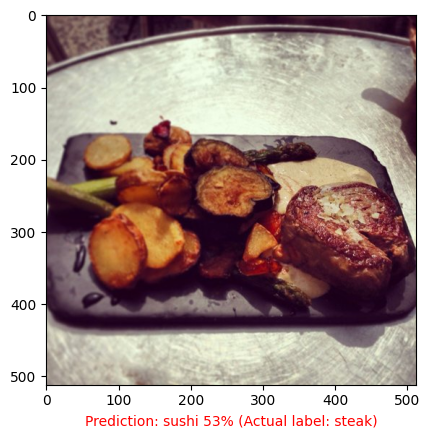

In [23]:
PredictRandomImage(model_tiny)

We can also notice that for our VGG-Tiny replication, there's still room for improvement in the validation accuracy. The Network is learning effectively the patterns in the training dataset, but it doesn't always translate when we try to attempt to get predictions in the testing dataset.

Training takes time, and if we look at the papers where these networks are trained, datasets are larger and the number of epochs used are normally around the 500-700 mark.

We can try to make a mixed model where we also run for a larger number of epochs and see what result we obtain.

#### Mixed CNN model


In [24]:
# TinyVGG CNN model-like. 
# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_mixed = tf.keras.models.Sequential([
    
  Input(shape=(224, 224, 3)),
  # 1st Conv
  Conv2D(filters=42, 
            kernel_size=8,
            activation="relu", 
            name='conv_1_1'), 
  Activation('relu', name='relu_1_1'),

  MaxPooling2D(pool_size=(2, 2), name='max_pool_1'),
  # 2nd conv
  Conv2D(84,(3, 3), name='conv_1_2'),
  Activation('relu', name='relu_1_2'), 

  MaxPooling2D(pool_size=(2, 2), name='max_pool_2'),
   # 3rd conv
  Conv2D(42,(3, 3), name='conv_2_1'),
  Activation('relu', name='relu_2_1'),
   # 4th conv
  Conv2D(11, (3, 3), name='conv_2_2'),
  Activation('relu', name='relu_2_2'), 
   
  MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
  Flatten(), 

  # 1st Fully Connected 
  Dense(2048, activation='relu'),
  Dropout(0.5),
  # 2nd Fully Connected  
  Dense(2048, activation='relu'),
  Dropout(0.5),
  
  #Output layer
  Dense(1, activation="sigmoid")])

In [25]:
# 2. Compile the model
model_mixed.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_mixed_history = model_mixed.fit(train_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5


2025-02-04 10:10:56.562393: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,84,106,106]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,42,108,108]{3,2,1,0}, f32[84,42,3,3]{3,2,1,0}, f32[84]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:10:57.700052: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,42,51,51]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,84,53,53]{3,2,1,0}, f32[42,84,3,3]{3,2,1,0}, f32[42]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_c

43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4781 - loss: 12.6295

2025-02-04 10:11:09.654589: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,84,106,106]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,42,108,108]{3,2,1,0}, f32[84,42,3,3]{3,2,1,0}, f32[84]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:11:10.283724: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[24,42,51,51]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,84,53,53]{3,2,1,0}, f32[42,84,3,3]{3,2,1,0}, f32[42]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_c

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.4789 - loss: 12.4397

2025-02-04 10:11:16.178545: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,84,106,106]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,42,108,108]{3,2,1,0}, f32[84,42,3,3]{3,2,1,0}, f32[84]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:11:16.994987: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,42,51,51]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,84,53,53]{3,2,1,0}, f32[42,84,3,3]{3,2,1,0}, f32[42]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_c

44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.4796 - loss: 12.2583 - val_accuracy: 0.5133 - val_loss: 0.6964
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.4923 - loss: 0.7067 - val_accuracy: 0.5117 - val_loss: 0.7247
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5409 - loss: 0.6768 - val_accuracy: 0.5267 - val_loss: 0.7464
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.4982 - loss: 0.6821 - val_accuracy: 0.5233 - val_loss: 0.7099
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5177 - loss: 0.6790 - val_accuracy: 0.5417 - val_loss: 0.9796


In [26]:
# 3. Fit the model
model_mixed_history = model_tiny.fit(train_dataset,
                        epochs=30,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.6550 - val_loss: 1.4950
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.6500 - val_loss: 1.6298
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.6583 - val_loss: 1.6998
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.6600 - val_loss: 1.7425
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.6600 - val_loss: 1.7955
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 1.0000 - loss: 9.7955e-04 - val_accuracy: 0.6600 - val_loss: 1.8456
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 1.0000 - loss: 7.0897e-04 - val_accuracy: 0.6583 - val_loss: 1.8746
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 1.0000 - loss: 5.8414e-04 - val_accuracy

We can see with this new model, the accuracy reached a 100% as it ended up overfitting while training. We can try to change a bit the way we organize the data for the train dataset and try something different.

In [27]:
train_dataset_2 = tf.keras.preprocessing.image_dataset_from_directory(training_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(300, 300),# resize image to the designated value
                                               label_mode="binary", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)


Found 1400 files belonging to 2 classes.


In [28]:
# Larger TinyVGG CNN model-like. 
# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_tiny_L_3 = tf.keras.models.Sequential([
      
      #Input

      # 1.1 Conv
      Conv2D(filters=20, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(300, 300, 3),name='conv_1_1'), 
      Activation('relu', name='relu_1_1'),
      # 1.2 Conv
      Conv2D(10,(3, 3), name='conv_1_2'),
      Activation('relu', name='relu_1_2'), 

      MaxPooling2D(pool_size=(2, 2), name='max_pool_1'),
      # 2.1 conv
      Conv2D(10,(3, 3), name='conv_2_1'),
      Activation('relu', name='relu_2_1'),     
      # 2.2 conv
      Conv2D(10, (3, 3), name='conv_2_2'),
      Activation('relu', name='relu_2_2'), 
      MaxPooling2D(pool_size=(2, 2), name='max_pool_2'),
      # 3.1 conv
      Conv2D(10,(3, 3), name='conv_3_1'),
      Activation('relu', name='relu_3_1'),
      # 3.2 conv
      Conv2D(10, (3, 3), name='conv_3_2'),
      Activation('relu', name='relu_3_2'), 
      Flatten(),
      Dense(1, activation="sigmoid")])

In [29]:
# 2. Compile the model
model_tiny_L_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_tiny_L_3_history = model_tiny.fit(train_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5


44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 1.0000 - loss: 4.7460e-05 - val_accuracy: 0.6500 - val_loss: 2.3966
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 1.0000 - loss: 4.5015e-05 - val_accuracy: 0.6500 - val_loss: 2.4108
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 1.0000 - loss: 4.2557e-05 - val_accuracy: 0.6500 - val_loss: 2.4294
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 4.0069e-05 - val_accuracy: 0.6500 - val_loss: 2.4388
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 1.0000 - loss: 3.6710e-05 - val_accuracy: 0.6500 - val_loss: 2.4525


After trying different models for binary classification, let's see how we would build a model for a multiclass classification.

For these networks with a limited test set and some not very differenciable, we can observe that the CNN we have used have almost reached their highest prediction accuracy. It would be a good experiment to try these networks for a multiclass problem by increasing the data we are training it with, swaping the output layer for a softmax activation layer and compare the changes in the performance.

Is there anything we could do when having this issue where we could see we need more data to avoid overfitting? Producing data by using data augmentation could help in some cases, as something as easy as flipping the pictures or rotating them maintain specific features we are looking for while generating new samples.

We need to also mind that these two examples could be quite similar when trying our network to spot the differences, so let's see the changes.


### Data augmentation 

We can access the [data augmentation ](https://www.tensorflow.org/tutorials/images/data_augmentation)function that Tensorflow offers to produce this new batch of data for the new training.

In [30]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="binary", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(testing_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224), # resize image to the designated value
                                               label_mode="binary", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

Found 1400 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


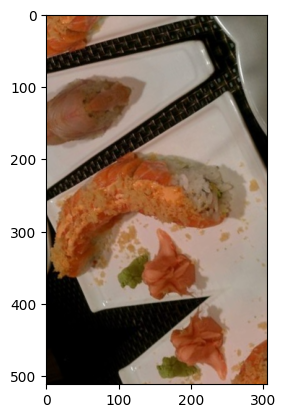

In [31]:
from tensorflow.keras.layers import Rescaling,RandomFlip,RandomRotation

data_augmentation = tf.keras.Sequential([
  Rescaling(1./255),
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

image_path="../Sources/food-101/train/sushi/768721.jpg"
image = mpimg.imread(image_path)
result = data_augmentation(image)
_ = plt.imshow(result)

There is two ways we can use these preprocessing layers in Tensorflow :

1. Add them to the model. In this case, this layer will only run when we are training and will add these variations to the images when the are pass through the input layer. The positive side of using it in our model is that we take advantage of GPU utilization, making the data processing and the training faster.

2. Create a dataset. This is the more typical way of using preprocessing functions, as we would create just another dataset that we can mix or use indepently for our future trainings.

I think it could be interesting to build alternative version of augmented models and then see how they perform, comparing them in a faster way the accuracy per epoch, as well as tracking how their loss perform overtime.

#### Augment AlexNet-like model

In [32]:
# AlexNet CNN model-like. 2nd Model.

# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_AN_aug = tf.keras.models.Sequential([
 #Augmented feed
   Rescaling(1./255),
   RandomFlip("horizontal_and_vertical"),
   RandomRotation(0.2),   

 # 1st Conv
   Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
 # 2nd Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
 # 3rd Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
 # 4th Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
 # 5th Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

 # Flatten layers
   Flatten(),

 # 1st Fully Connected 
   Dense(4096, activation='relu'),
   Dropout(0.5),
 # 2nd Fully Connected  
   Dense(4096, activation='relu'),
   Dropout(0.5),

 # Output Layer 
   Dense(1, activation="sigmoid") 
])

# 2. Compile the model
model_AN_aug.compile(loss="binary_crossentropy",
              #optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.015),
              metrics=["accuracy"])

# 3. Fit the model
model_AN_aug_history = model_AN_aug.fit(train_dataset,
                        epochs=5 ,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.5234 - loss: 13257229.0000 - val_accuracy: 0.5000 - val_loss: 43.6118
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5096 - loss: 25.6514 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.4863 - loss: 0.9385 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4966 - loss: 0.7305 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.4729 - loss: 0.7105 - val_accuracy: 0.5000 - val_loss: 0.6934


#### Augment TinyVGG-like model

In [33]:
# TinyVGG CNN model-like. 
# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_tiny_aug = tf.keras.models.Sequential([

     #Augmented feed
     Rescaling(1./255),
     RandomFlip("horizontal_and_vertical"),
     RandomRotation(0.2),   

     #Input
     Input(shape=(224, 224, 3)),

     #1st Conv
     Conv2D(filters=10, 
                    kernel_size=3,
                    activation="relu", 
                    name='conv_1_1'), 
     Activation('relu', name='relu_1_1'),

     #2nd Conv
     Conv2D(10,(3, 3), name='conv_1_2'),
     Activation('relu', name='relu_1_2'), 

     MaxPooling2D(pool_size=(2, 2), name='max_pool_1'),

     #3rd Conv

     Conv2D(10,(3, 3), name='conv_2_1'),
     Activation('relu', name='relu_2_1'),

     #4rd Conv

     Conv2D(10, (3, 3), name='conv_2_2'),
     Activation('relu', name='relu_2_2'), 

     Flatten(),
     Dense(1, activation="sigmoid")])

# 2. Compile the model
model_tiny_aug.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_tiny_aug_history = model_tiny.fit(train_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 1.0000 - loss: 3.4086e-05 - val_accuracy: 0.6500 - val_loss: 2.4657
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 1.0000 - loss: 3.2292e-05 - val_accuracy: 0.6483 - val_loss: 2.4766
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 1.0000 - loss: 3.0422e-05 - val_accuracy: 0.6483 - val_loss: 2.4927
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 2.8229e-05 - val_accuracy: 0.6467 - val_loss: 2.5038
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 2.7167e-05 - val_accuracy: 0.6483 - val_loss: 2.5111


#### Mixed CNN model Augmented


In [34]:
# TinyVGG CNN model-like. 
# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_mixed_aug = tf.keras.models.Sequential([
    
   #Input
   Input(shape=(224, 224, 3)),
   # 1st Conv
   Conv2D(filters=42, 
            kernel_size=8,
            activation="relu", 
            name='conv_1_1'), 
   Activation('relu', name='relu_1_1'),

   MaxPooling2D(pool_size=(2, 2), name='max_pool_1'),
    # 2nd conv
   Conv2D(84,(3, 3), name='conv_1_2'),
   Activation('relu', name='relu_1_2'), 

   MaxPooling2D(pool_size=(2, 2), name='max_pool_2'),
    # 3rd conv
   Conv2D(42,(3, 3), name='conv_2_1'),
   Activation('relu', name='relu_2_1'),
    # 4th conv
   Conv2D(11, (3, 3), name='conv_2_2'),
   Activation('relu', name='relu_2_2'), 

   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
   Flatten(),
   # 1st Fully Connected 
   Dense(2048, activation='relu'),
   Dropout(0.5),
   # 2nd Fully Connected  
   Dense(2048, activation='relu'),
   Dropout(0.5),
   #Output
   Dense(1, activation="sigmoid")])

# 2. Compile the model
model_mixed_aug.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_mixed_aug_history = model_mixed_aug.fit(train_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_dataset),
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.5146 - loss: 32.9531 - val_accuracy: 0.5867 - val_loss: 0.6675
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.6466 - loss: 0.6266 - val_accuracy: 0.6600 - val_loss: 0.5989
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7476 - loss: 0.5243 - val_accuracy: 0.7067 - val_loss: 0.5715
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.8154 - loss: 0.4217 - val_accuracy: 0.7050 - val_loss: 0.6819
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.8490 - loss: 0.3309 - val_accuracy: 0.6950 - val_loss: 0.8005


### Final Comparison

We have run some different experiments until now. So far, none of them have stood out completely despite trying different methodologies to build an effective model to make an effective classification between these two types of images. Still, we can at least try to study what model has performed better and could be the way to build a more optimal model in the future.


In [35]:
import pandas as pd

In [36]:
model_tiny_aug_history


## Creating a CNN for a multiclass classification problem

We are continuing here to compare the final results after we complete the experiment below. First, we are going to create a new dataset using the same preprocessing function we used before, this time aiming to the new folder where we have a wider range of data.

Let's take a view on some image by writting down the name of the food folder we want to check.

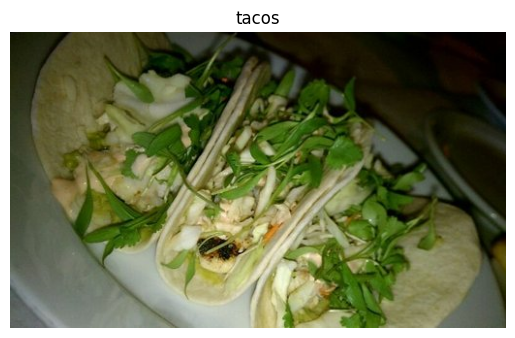

In [38]:
source_path = "../Sources/Food-101-11/train/"
train_image = DisplayImage(source_path,"tacos")

Let's prepare the data by generating training and testing dataset as we did before. This time, as we have 11 classes, there is no longer a binary but a categorical classification done. We need to extract the name of the classes and store it in a list so we can identify later the validation what class the values correspond.

In [39]:
training_11_dir= "../Sources/Food-101-11/train"
testing_11_dir = "../Sources/Food-101-11/test"

In [40]:
# Get the class names for our multi-class dataset
import pathlib
data_dir = pathlib.Path(training_11_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['hamburger' 'oysters' 'pancakes' 'risotto' 'steak' 'sushi' 'tacos'
 'takoyaki' 'tiramisu' 'tuna_tartare' 'waffles']


In [164]:
train_11_dataset_unshuffled = tf.keras.preprocessing.image_dataset_from_directory(training_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=False, # images unmixed
                                               seed=10)

test_11_dataset_unshuffled = tf.keras.preprocessing.image_dataset_from_directory(testing_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224), # resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=False, # images unmixed
                                               seed=10)

Found 7700 files belonging to 11 classes.
Found 3300 files belonging to 11 classes.


In [41]:
train_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

test_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(testing_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224), # resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

Found 7700 files belonging to 11 classes.
Found 3300 files belonging to 11 classes.


Let's use the same models we used for binary classification but tune them to be used for this multiclass classification in this setup. We need to main changes :

1. The structure needs to change slightly for the output layer. We don't expect a single value anymore, but an array of probabilites as this is what we would obtain with `softmax`. So, we need to use `softmax` as the activation value for the output layer, and we need to set the `number of outputs` as the number of classes we are using.

2. We need to change the loss calculation to `categorical_crossentropy` as now we are dealing with categorical instead of binary values.


In [42]:
# AlexNet CNN model-like

# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_AN_11 = tf.keras.models.Sequential([
   # 1st Conv
   Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
   # 2nd Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
   # 3rd Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
   # 4th Conv
   Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same'),
   # 5th Conv
   Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
   MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
   # Flatten layers
   Flatten(),
   # 1st Fully Connected 
   Dense(4096, activation='relu'),
   Dropout(0.5),
   # 2nd Fully Connected  
   Dense(4096, activation='relu'),
   Dropout(0.5),
   # Output Layer 
   Dense(11, activation="softmax") 
])

# 2. Compile the model
model_AN_11.compile(loss="categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_AN_11_history = model_AN_11.fit(train_11_dataset,
                        epochs=5 ,
                        steps_per_epoch=len(train_11_dataset),
                        validation_data=test_11_dataset,
                        validation_steps=len(test_11_dataset))

Epoch 1/5
240/241 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0974 - loss: 20.4259

2025-02-04 10:20:16.146799: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,256,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,96,26,26]{3,2,1,0}, f32[256,96,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:20:16.349136: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,384,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,256,12,12]{3,2,1,0}, f32[384,256,3,3]{3,2,1,0}, f32[384]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasA

241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0973 - loss: 20.3658

2025-02-04 10:20:23.452369: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,256,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,96,26,26]{3,2,1,0}, f32[256,96,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:20:23.570707: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,384,12,12]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,256,12,12]{3,2,1,0}, f32[384,256,3,3]{3,2,1,0}, f32[384]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActiv

241/241 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.0973 - loss: 20.3063 - val_accuracy: 0.0909 - val_loss: 2.3989
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.0876 - loss: 2.3998 - val_accuracy: 0.0909 - val_loss: 2.3984
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.0821 - loss: 2.3994 - val_accuracy: 0.0909 - val_loss: 2.3981
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.0812 - loss: 2.3990 - val_accuracy: 0.0909 - val_loss: 2.3980
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.0817 - loss: 2.3990 - val_accuracy: 0.0909 - val_loss: 2.3980


We can expect that the accuracy to decrease largely as we are not classifiying two classes anymore but eleven classes. Before, even if our model was bad, it had already 50% of chances in classifying effectively a class. Now, the chances of randomly guessing a category are around 0.0909 %.

Let's see what a simpler model that might not fall into overfitting classifies with this new dataset, and compare with the augmented model as well.

Let's check also what is the result if we run for a larger number of epochs as the problem has become more complex when adding 9 more classes than we had before.

In [43]:
# TinyVGG CNN model-like. 
# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_tiny_11 = tf.keras.models.Sequential([
      Input(shape=(224, 224, 3)),
      # 1.1 Conv
      Conv2D(filters=10, 
        kernel_size=3,
        activation="relu", 
        name='conv_1_1'), 
      Activation('relu', name='relu_1_1'),
      # 1.2 Conv
      Conv2D(10,(3, 3), name='conv_1_2'),
      Activation('relu', name='relu_1_2'), 

      MaxPooling2D(pool_size=(2, 2), name='max_pool_1'),
      # 2.1 Conv
      Conv2D(10,(3, 3), name='conv_2_1'),
      Activation('relu', name='relu_2_1'),
      # 2.2 Conv
      Conv2D(10, (3, 3), name='conv_2_2'),
      Activation('relu', name='relu_2_2'), 
      Flatten(),
      #Output
      Dense(11, activation="softmax")])

# 2. Compile the model
model_tiny_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_tiny_11_history = model_tiny_11.fit(train_11_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_11_dataset),
                        validation_data=test_11_dataset,
                        validation_steps=len(test_11_dataset))

Epoch 1/5
240/241 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1013 - loss: 74.0808

2025-02-04 10:21:32.113714: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:21:32.309922: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,10,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,10,222,222]{3,2,1,0}, f32[10,10,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1013 - loss: 73.8616

2025-02-04 10:21:37.904249: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-04 10:21:38.047281: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,10,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,10,222,222]{3,2,1,0}, f32[10,10,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.1014 - loss: 73.6443 - val_accuracy: 0.1058 - val_loss: 2.4837
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.4918 - loss: 1.6128 - val_accuracy: 0.1236 - val_loss: 2.6862
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.8063 - loss: 0.7276 - val_accuracy: 0.1252 - val_loss: 3.8883
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9450 - loss: 0.2402 - val_accuracy: 0.1170 - val_loss: 4.8838
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9866 - loss: 0.0883 - val_accuracy: 0.1121 - val_loss: 5.0659


In [44]:
# TinyVGG CNN model-like. 
# Select random seed

tf.random.set_seed(10)

# 1. Create the model.

model_tiny_11_aug = tf.keras.models.Sequential([

     #Input
     Input(shape=(224, 224, 3)),
     #Augmented feed
     Rescaling(1./255),
     RandomFlip("horizontal_and_vertical"),
     RandomRotation(0.2),   
     #1st Conv
     Conv2D(filters=10, 
                    kernel_size=3,
                    activation="relu", 
                    name='conv_1_1'), 
     Activation('relu', name='relu_1_1'),
     #2nd Conv
     Conv2D(10,(3, 3), name='conv_1_2'),
     Activation('relu', name='relu_1_2'), 

     MaxPooling2D(pool_size=(2, 2), name='max_pool_1'),
     #3rd Conv
     Conv2D(10,(3, 3), name='conv_2_1'),
     Activation('relu', name='relu_2_1'),
     #4rd Conv
     Conv2D(10, (3, 3), name='conv_2_2'),
     Activation('relu', name='relu_2_2'), 
     Flatten(),
     Dense(11, activation="softmax")])

# 2. Compile the model
model_tiny_11_aug.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_tiny_11_aug_history = model_tiny_11_aug.fit(train_11_dataset,
                        epochs=5,
                        steps_per_epoch=len(train_11_dataset),
                        validation_data=test_11_dataset,
                        validation_steps=len(test_11_dataset))

Epoch 1/5


241/241 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - accuracy: 0.1128 - loss: 2.5066 - val_accuracy: 0.1294 - val_loss: 2.3768
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.1434 - loss: 2.3606 - val_accuracy: 0.1721 - val_loss: 2.3115
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.1818 - loss: 2.3171 - val_accuracy: 0.1848 - val_loss: 2.2880
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.2046 - loss: 2.2814 - val_accuracy: 0.2045 - val_loss: 2.2583
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.2154 - loss: 2.2487 - val_accuracy: 0.2158 - val_loss: 2.2375


In [45]:
model_aug_longepoch = tf.keras.models.clone_model(model_tiny_11_aug)

# 2. Compile the model
model_aug_longepoch.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_aug_longepoch_history = model_aug_longepoch.fit(train_11_dataset,
                        epochs=50,
                        steps_per_epoch=len(train_11_dataset),
                        validation_data=test_11_dataset,
                        validation_steps=len(test_11_dataset))

Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.1412 - loss: 2.3875 - val_accuracy: 0.1836 - val_loss: 2.3152
Epoch 2/50
 98/241 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.1808 - loss: 2.3028

241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.1920 - loss: 2.2824 - val_accuracy: 0.2112 - val_loss: 2.2545
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.2193 - loss: 2.2142 - val_accuracy: 0.2279 - val_loss: 2.2097
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.2443 - loss: 2.1761 - val_accuracy: 0.2521 - val_loss: 2.1666
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.2598 - loss: 2.1358 - val_accuracy: 0.2509 - val_loss: 2.1520
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.2655 - loss: 2.1126 - val_accuracy: 0.2888 - val_loss: 2.0916
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.2944 - loss: 2.0745 - val_accuracy: 0.2994 - val_loss: 2.0651
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.2991 - loss: 2.0497 - val_accuracy: 0.2903 - val_loss: 2.1034
Epoch 9/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.3087 - loss: 1.9973 - val_accurac

I would say this last experiment has gotten quite promising ! Increasing the number of epochs when having a richer dataset has actually impacted the performance and efficiency of our latest network.

This should not be a surprise as when we read some of the research papers from the models we are using, the experiments can run up to 500 epochs to train those networks.

Let's create a similar function, as we did before, to display the array of class probabilities that our network assigns to the different random pictures we try to predict.

In [46]:
class_names_11 = train_11_dataset.class_names
print(class_names)


['hamburger' 'oysters' 'pancakes' 'risotto' 'steak' 'sushi' 'tacos'
 'takoyaki' 'tiramisu' 'tuna_tartare' 'waffles']


We can also try to show more images per prediction by predicting a batch of images. First, let's take a look at how to obtain a batch from the testing dataset.

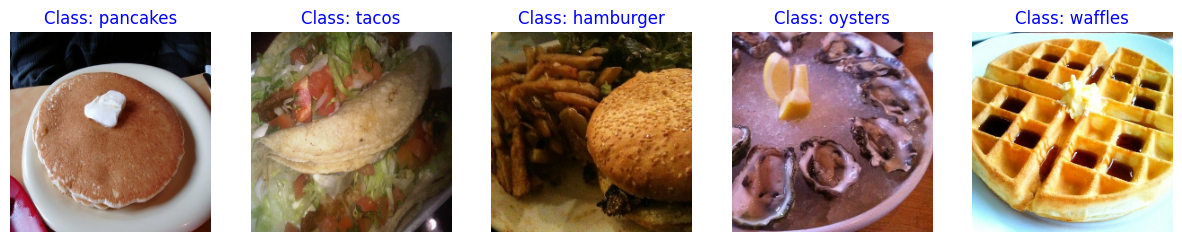

In [250]:
for images, labels in test_11_dataset.take(1): 
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Display 5 images
    for i in range(5):
        axes[i].axis("off")        
        axes[i].imshow(images[i].numpy().astype("uint8"))
        label_index = labels[i].numpy().argmax() 
        axes[i].set_title(f"Class: {class_names[label_index]}",color="blue")
    plt.show()

This time, we can just predict a batch of images in one go instead of picking a random image from the folder. We would get the information from the dataset we created, remember that when we used `image_dataset_from_directory` we obtain the labels as we created specific directory names for each specific class of images, so this information is retained.

We would get then when predicting an array of array of probabilities. We just need to pick up the array of probabilities in each iteration and we would obtain each classification of each image. Simple !

In [240]:
def PredictRandomImage_11(model,dataset,class_list):
  """Displays a random image from the dataset and shows if the prediction label
     correlates with the image folder's label

  Args:
    model: Trained model with the dataset.

  """
  plt.close()

  for images, labels in dataset.take(1):  # Take first batch
      fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Display 5 images
      predicts = model.predict(images)
      for i in range(5):
          label_index = labels[i].numpy().argmax()  # Convert one-hot to index
          predict_inxex = tf.argmax(predicts[i])
          if class_names[predict_inxex] == class_names[label_index]:
            color = "green"
          else:
            color = "red"
          axes[i].imshow(images[i].numpy().astype("uint8"))
          label_index = labels[i].numpy().argmax()  # Convert one-hot to index
          axes[i].set_title(f"Class: {class_names[predict_inxex]} \n Actual class : {class_names[label_index]}  ",color=color)
          axes[i].axis("off")
      plt.show()


Passing now the last model, the test dataset and the class names for a correct representation...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


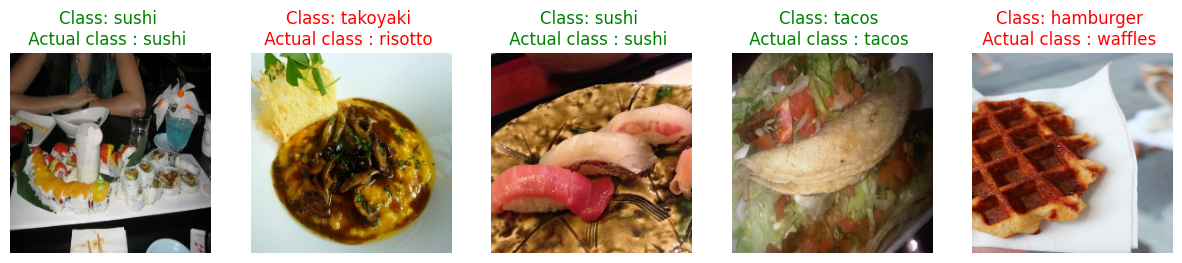

In [245]:
PredictRandomImage_11(model_aug_longepoch,test_11_dataset,class_names_11)

If we wanted to visualize for this model the accuracy and loss curves

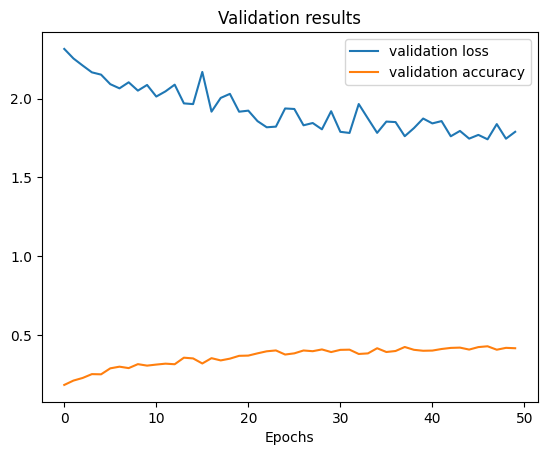

In [255]:
def PlotValidatedAccuracyAndLoss(history):
  """
  Plot the evolution of accuracy and loss of the model against the validation test dataset.
  """ 
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure()
  plt.plot(epochs, val_loss, label='validation loss')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('Validation results')
  plt.xlabel('Epochs')
  plt.legend();

PlotValidatedAccuracyAndLoss(model_aug_longepoch_history)

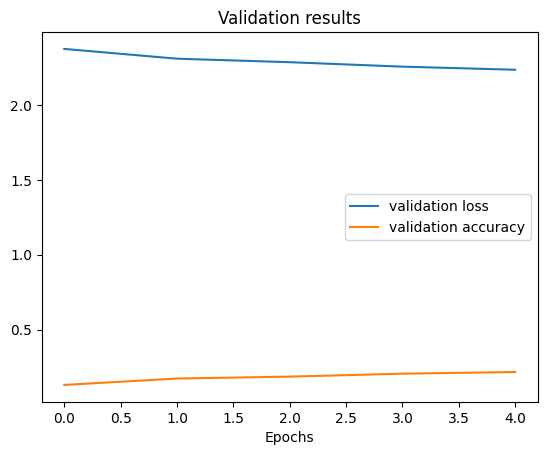

In [256]:
PlotValidatedAccuracyAndLoss(model_tiny_11_aug_history)

The range is quite different between as the models we were training before were done just for 4 epochs compared to the 50 we ran in the last model. Still, we can see how the validation loss curve has a better shape in the last few epochs on the last augmented model as the learning was more successful in the first epochs compared to the tiny_11 model.

More epochs would be greater for both models, but we can try to also see if we can save these weights and find weights to use from other trained models into these models.

### Saving our model

We have completed now in this notebook some good examples of building different architectures to tackle a binary classification and multiclassification problem with convoluted neural network. If we would like to use these models in the future, it is good to have available these weights.

Likewise we could find other models as we were mentioning before and see how they would perform against the same dataset, which is something we could see in future notes!


In [257]:
model_aug_longepoch.save('saved_models/50e-11class-mixaug.keras')